In [ ]:
%pip install networkx numpy scipy cdlib matplotlib markov-clustering igraph leidenalg infomap torch-geometric pandas

In [2]:
import numpy as np
import pandas as pd
import networkx as nx
from networkx.algorithms import community
import matplotlib.pyplot as plt
import random
from cdlib import algorithms
from cdlib import viz
from cdlib import evaluation

Note: to be able to use all crisp methods, you need to install some additional packages:  {'karateclub', 'wurlitzer', 'graph_tool'}
Note: to be able to use all overlapping methods, you need to install some additional packages:  {'karateclub', 'ASLPAw'}
Note: to be able to use all bipartite methods, you need to install some additional packages:  {'wurlitzer'}


In [3]:
graph_edges = 'large_twitch_edges.csv'
graph_features = 'large_twitch_features.csv'

edges = pd.read_csv(graph_edges)
features = pd.read_csv(graph_features)

In [4]:
edges.head()

,numeric_id_1,numeric_id_2
0,98343,141493
1,98343,58736
2,98343,140703
3,98343,151401
4,98343,157118


In [5]:
features = features.set_index('numeric_id')
features.head()

,views,mature,life_time,created_at,updated_at,dead_account,language,affiliate
numeric_id,,,,,,,,
0,7879,1,969,2016-02-16,2018-10-12,0,EN,1
1,500,0,2699,2011-05-19,2018-10-08,0,EN,0
2,382502,1,3149,2010-02-27,2018-10-12,0,EN,1
3,386,0,1344,2015-01-26,2018-10-01,0,EN,0
4,2486,0,1784,2013-11-22,2018-10-11,0,EN,0


In [6]:
merged_dataset = pd.merge(edges, features,left_on='numeric_id_1',right_on='numeric_id')
merged_dataset.head()

,numeric_id_1,numeric_id_2,views,mature,life_time,created_at,updated_at,dead_account,language,affiliate
0,98343,141493,282,0,2086,2012-12-27,2018-09-13,0,EN,0
1,98343,58736,282,0,2086,2012-12-27,2018-09-13,0,EN,0
2,98343,140703,282,0,2086,2012-12-27,2018-09-13,0,EN,0
3,98343,151401,282,0,2086,2012-12-27,2018-09-13,0,EN,0
4,98343,157118,282,0,2086,2012-12-27,2018-09-13,0,EN,0


In [7]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [8]:
G = nx.from_pandas_edgelist(merged_dataset,source='numeric_id_1', target='numeric_id_2')

In [9]:
frac = 0.02
nodes = random.sample(G.nodes(), int(frac * len(G)))

In [10]:
G1 = G.subgraph(nodes)

In [11]:
print('no. of nodes',G1.number_of_nodes())
print('no. of edges',G1.number_of_edges())

no. of nodes 3362
no. of edges 2652


In [12]:
pos = nx.fruchterman_reingold_layout(G1)

In [14]:
lp_coms = algorithms.label_propagation(G1)

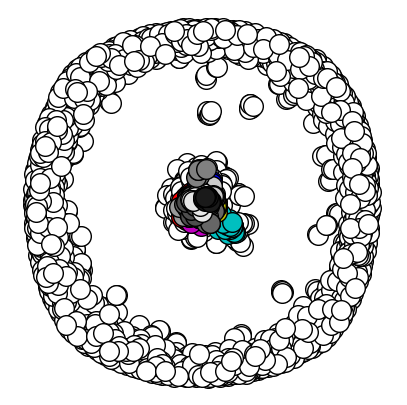

In [15]:
viz.plot_network_clusters(G1, lp_coms, pos, figsize=(5, 5))

In [16]:
frac = 0.05
nodes = random.sample(G.nodes(), int(frac * len(G)))
G2 = G.subgraph(nodes)
print('no. of nodes',G2.number_of_nodes())
print('no. of edges',G2.number_of_edges())

no. of nodes 8405
no. of edges 17514


In [17]:
pos = nx.fruchterman_reingold_layout(G2)

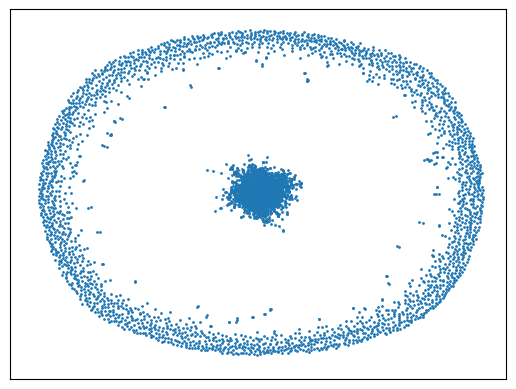

In [18]:
nx.draw_networkx_nodes(G2, pos=pos,node_size=1)
nx.draw_networkx_edges(G2, pos=pos,width=0.05)

In [19]:
lp_coms = algorithms.label_propagation(G2)

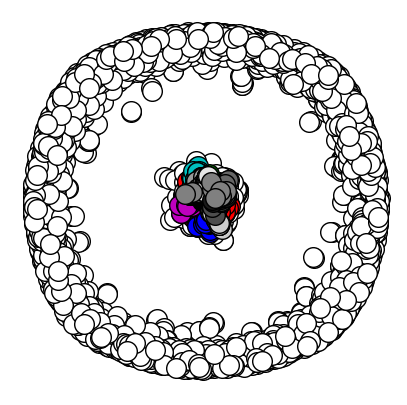

In [20]:
viz.plot_network_clusters(G2, lp_coms, pos, figsize=(5, 5))

In [21]:
print("Number of communities:", len(lp_coms.communities))
print("Modularity:", evaluation.newman_girvan_modularity(G2, lp_coms))

Number of communities: 2677
Modularity: FitnessResult(min=None, max=None, score=0.19728622720186376, std=None)


In [22]:
louvain_coms = algorithms.louvain(G2, weight='weight', resolution=1.)

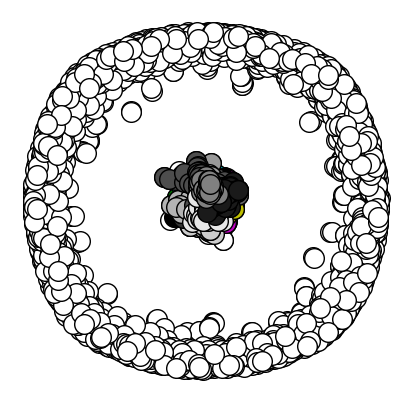

In [23]:
viz.plot_network_clusters(G2, louvain_coms, pos, figsize=(5, 5))

In [24]:
print("Number of communities:", len(louvain_coms.communities))
print("Modularity:", evaluation.newman_girvan_modularity(G2, louvain_coms))

Number of communities: 2461
Modularity: FitnessResult(min=None, max=None, score=0.5368719364057503, std=None)


In [ ]:
print(louvain_coms.communities)

In [26]:
leiden_coms = algorithms.leiden(G2)

In [27]:
print("Number of communities:", len(leiden_coms.communities))
print("Modularity:", evaluation.newman_girvan_modularity(G2, leiden_coms))

Number of communities: 2459
Modularity: FitnessResult(min=None, max=None, score=0.5563534327271519, std=None)


In [28]:
markov_coms = algorithms.markov_clustering(G2)

In [29]:
print("Number of communities:", len(markov_coms.communities))
print("Modularity:", evaluation.newman_girvan_modularity(G2, markov_coms))

Number of communities: 3716
Modularity: FitnessResult(min=None, max=None, score=-2.802045546062046e-05, std=None)


### complete graph

In [30]:
louvain_coms = algorithms.louvain(G, weight='weight', resolution=1.)

In [31]:
print("Number of communities:", len(louvain_coms.communities))
print("Modularity:", evaluation.newman_girvan_modularity(G, louvain_coms))

Number of communities: 21
Modularity: FitnessResult(min=None, max=None, score=0.4221643537807529, std=None)


In [38]:
resols = [0.1,2, 5,10]
for res in resols:
  louvain_coms = algorithms.louvain(G, weight='weight', resolution=res)
  print("resolution value", res)
  print("Number of communities:", len(louvain_coms.communities))
  print("Modularity:", evaluation.newman_girvan_modularity(G, louvain_coms))
  print("------------------------------------------------------------------")

resolution value 0.1
Number of communities: 25974
Modularity: FitnessResult(min=None, max=None, score=0.0481684109892537, std=None)
------------------------------------------------------------------
resolution value 2
Number of communities: 48
Modularity: FitnessResult(min=None, max=None, score=0.3873128273270216, std=None)
------------------------------------------------------------------
resolution value 5
Number of communities: 195
Modularity: FitnessResult(min=None, max=None, score=0.3094685694774048, std=None)
------------------------------------------------------------------
resolution value 10
Number of communities: 539
Modularity: FitnessResult(min=None, max=None, score=0.26322755743879295, std=None)
------------------------------------------------------------------


In [33]:
leiden_coms = algorithms.leiden(G)

In [34]:
print("Number of communities:", len(leiden_coms.communities))
print("Modularity:", evaluation.newman_girvan_modularity(G, leiden_coms))

Number of communities: 25
Modularity: FitnessResult(min=None, max=None, score=-0.0002303051013605987, std=None)


In [ ]:
# with tf.device('/device:GPU:0'):
#   markov_coms = algorithms.markov_clustering(G)

In [ ]:
# print("Number of communities:", len(markov_coms.communities))
# print("Modularity:", evaluation.newman_girvan_modularity(G, markov_coms))

# RAM exhausts for markov clustering algorithm

In [35]:
lp_coms = algorithms.label_propagation(G)

In [36]:
print("Number of communities:", len(lp_coms.communities))
print("Modularity:", evaluation.newman_girvan_modularity(G, lp_coms))

Number of communities: 79
Modularity: FitnessResult(min=None, max=None, score=0.03567630678997075, std=None)


#### Since we could see only louvain is showing a result with considerable modularity, let's work around louvain with different graphs from original graph with select columns only to detect communities for different purposes

In [40]:
dataset_lang = merged_dataset.drop(columns=['views', 'life_time', 'mature', 'created_at', 'updated_at', 'affiliate'])
dataset_lang.head()

,numeric_id_1,numeric_id_2,dead_account,language
0,98343,141493,0,EN
1,98343,58736,0,EN
2,98343,140703,0,EN
3,98343,151401,0,EN
4,98343,157118,0,EN


In [42]:
G3 = nx.from_pandas_edgelist(dataset_lang,source='numeric_id_1', target='numeric_id_2')

In [44]:
resols = [0.1, 0.5, 1,2, 5]
for res in resols:
  louvain_coms = algorithms.louvain(G, weight='weight', resolution=res)
  print("resolution value", res)
  print("Number of communities:", len(louvain_coms.communities))
  print("Modularity:", evaluation.newman_girvan_modularity(G, louvain_coms))
  print("------------------------------------------------------------------")

resolution value 0.1
Number of communities: 29506
Modularity: FitnessResult(min=None, max=None, score=0.22005402729880869, std=None)
------------------------------------------------------------------
resolution value 0.5
Number of communities: 30940
Modularity: FitnessResult(min=None, max=None, score=0.2591896339004986, std=None)
------------------------------------------------------------------
resolution value 1
Number of communities: 19
Modularity: FitnessResult(min=None, max=None, score=0.425934096352579, std=None)
------------------------------------------------------------------
resolution value 2
Number of communities: 48
Modularity: FitnessResult(min=None, max=None, score=0.3850062848896481, std=None)
------------------------------------------------------------------
resolution value 5
Number of communities: 196
Modularity: FitnessResult(min=None, max=None, score=0.31070181842154787, std=None)
------------------------------------------------------------------
